In [1]:
#########################################
#                                       #
#   Programa pra gera e ler um QRcode   #
#                                       #
#########################################

#Bibliotecas
import cv2
from pyzbar.pyzbar import decode, ZBarSymbol
import pyqrcode
import qrcode
import matplotlib.pyplot as plt

print(cv2.__version__)

#Gerar o QRcode

def qrcodeGen():
    #Qrcode teste
    qr = qrcode.QRCode(
    version = 3, #Tamanho do QRCode (1-40)
    error_correction = qrcode.constants.ERROR_CORRECT_H, # Error Correction (ERROR_CORRECT_L, ERROR_CORRECT_M, ERROR_CORRECT_Q, ERROR_CORRECT_H)
    box_size = 10, #QUandos pixels cada "box" do QRcode tem
    border = 4, #Quantos boxes-Ticks (min=4)
    )
    dados = "Teste"

    qr.add_data(dados)
    qr.make(fit=True)

    img = qr.make_image()
    img.save("image.png")

qrcodeGen()

4.3.0


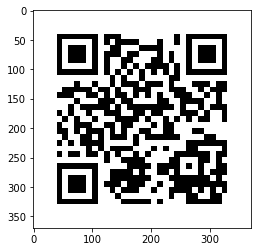

In [2]:
img = cv2.imread('image.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap = 'gray')

In [8]:
print(decode(img))

[Decoded(data=b'Teste', type='QRCODE', rect=Rect(left=40, top=40, width=290, height=290), polygon=[Point(x=40, y=40), Point(x=40, y=330), Point(x=330, y=330), Point(x=330, y=40)])]


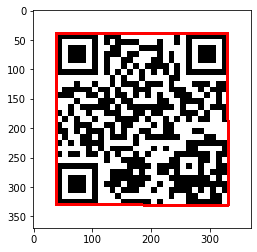

In [3]:
for code in decode(img):
    points = code.polygon
    # Se os pontos não formarem um quad, encontre o convexHull
    if len(points) > 4 : 
        hull = cv2.convexHull(np.array([point for point in points], dtype=np.float32))
        hull = list(map(tuple, np.squeeze(hull)))
    else : 
        hull = points
    # Numero de pontos do convexHull
    n = len(hull)     
    # Draw the convext hull
    for j in range(0,n):
        cv2.line(img, hull[j], hull[ (j+1) % n], (255,0,0), 3)
        
plt.imshow(img, cmap = 'gray')

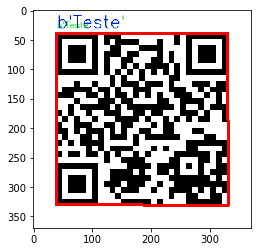

In [7]:
for code in decode(img):
    x = code.rect.left
    y = code.rect.top
    barCode = str(code.data)
    cv2.putText(img, barCode, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 1, cv2.LINE_AA)
            
plt.imshow(img, cmap = 'gray')